In [1]:
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
class HH:
    def __init__(self, Vm=-65, n0=0.3, h0=0.05, m0=0.6, ENa=55, EK=-77, Cm=1, gK0=35, gNa0=40, gL=0.3, EL=-65 , time=100, dt=0.01):
        self.Vm = Vm
        self.n0 = n0
        self.m0 = m0
        self.h0 = h0
        self.ENa = ENa
        self.EK = EK
        self.Cm = Cm
        self.gK0 = gK0
        self.gNa0 = gNa0
        self.gL = gL
        self.EL = EL
        self.time = time
        self.dt = dt

        self.range = np.arange(0, time, dt)

    def alpha_n(self, V): return 0.02*(V-25.0)/(1.0 - sp.exp(-(V-25.0) / 9.0))
    def beta_n(self, V):  return -0.002*((V-25)/(1.0-sp.exp((V-25)/9)))

    def alpha_m(self, V): return 0.182*(V + 35)/(1-sp.exp(-(V+35) / 9.0))
    def beta_m(self, V):  return -0.124*((V+35)/ (1 - sp.exp((V+35) / 9.0)))

    def alpha_h(self, V): return 0.25 * sp.exp(-(V+90)/12)
    def beta_h(self, V):  return 0.25* (sp.exp((V+62)/6))/(sp.exp((V+90)/12))

    def model(self, mode='pulse', I=1, finish_pulse = 0.2):
        Vlist = [self.Vm]
        gNaList = [self.gNa0]
        gKList = [self.gK0]
        m_list = [self.m0]
        n_list = [self.n0]
        h_list = [self.h0]
        INaList = [0]
        IKList = [0]
        if mode=='pulse':
            Ilist = [I if self.range[step] < finish_pulse else 0 for step in range(self.range.size)]
        elif mode=='const':
            Ilist = [I for step in range(self.range.size)]
        for t in range(len(self.range)-1):
            gNa  = self.gNa0*m_list[-1]**3* h_list[-1]            
            gK   = self.gK0*n_list[-1]**4 
            INa = gNa* (Vlist[-1] - self.ENa)
            IK = gK * (Vlist[-1] - self.EK)
            IL = self.gL * (Vlist[-1] - self.EL)
            dv = (Ilist[t] - INa - IK - IL)/self.Cm
            dm = self.alpha_m(Vlist[-1])*(1.0-m_list[-1]) - self.beta_m(Vlist[-1])*m_list[-1]
            dh = self.alpha_h(Vlist[-1])*(1.0-h_list[-1])- self.beta_h(Vlist[-1])*h_list[-1]
            dn = self.alpha_n(Vlist[-1])*(1.0-n_list[-1])- self.beta_n(Vlist[-1])*n_list[-1]
            V = Vlist[-1] + dv*self.dt
            m = m_list[-1] + dm*self.dt
            h = h_list[-1] + dh*self.dt
            n = n_list[-1] + dn*self.dt
            Vlist.append(V)
            m_list.append(m)
            n_list.append(n)
            h_list.append(h)
            INaList.append(INa)
            IKList.append(IK)
        
        tmp = np.where(np.array(Vlist) >= 0)[0]
        if len(tmp)>1:
            width = 2*(tmp[-1]-tmp[0])*0.01
        else:
            width=0
        return Vlist,m_list,n_list,h_list,INaList,IKList, width

    def plot_results(self, vlist, m, n, h, Ina, Ik, width):
        fig = plt.figure(figsize=(30, 25))
        ax = plt.subplot(411)
        ax.set_title("Membrane potential during time")
        ax.plot(self.range,vlist, label='membrane potential')
        ax.set_ylabel('Voltage (Vm)')
        ax.set_xlabel('Time (ms)')

        ax2 = plt.subplot(412)
        ax2.set_title("injected current during time for Na")
        ax2.plot(self.range, Ina)
        ax2.set_ylabel('Current (micro A)')
        ax2.set_xlabel('Time (ms)')

        ax3 = plt.subplot(413)
        ax3.set_title("injected current during time for K")
        ax3.plot(self.range, Ik)
        ax3.set_ylabel('Current (micro A)')
        ax3.set_xlabel('Time (ms)')

        ax4 = plt.subplot(414)
        ax4.set_title("Coefficients (m, n and h) during time")
        ax4.plot(self.range, m, label='m')
        ax4.plot(self.range, n, label='n')
        ax4.plot(self.range, h, label='h')
        ax4.set_xlabel('Time (ms)')
        ax4.legend()

        plt.legend()
        plt.show()
        print("width is " + str(width) + "ms")
        


# Analytical Questions

## 1. the minimal current leading to repetitive spiking

### I = 0.385

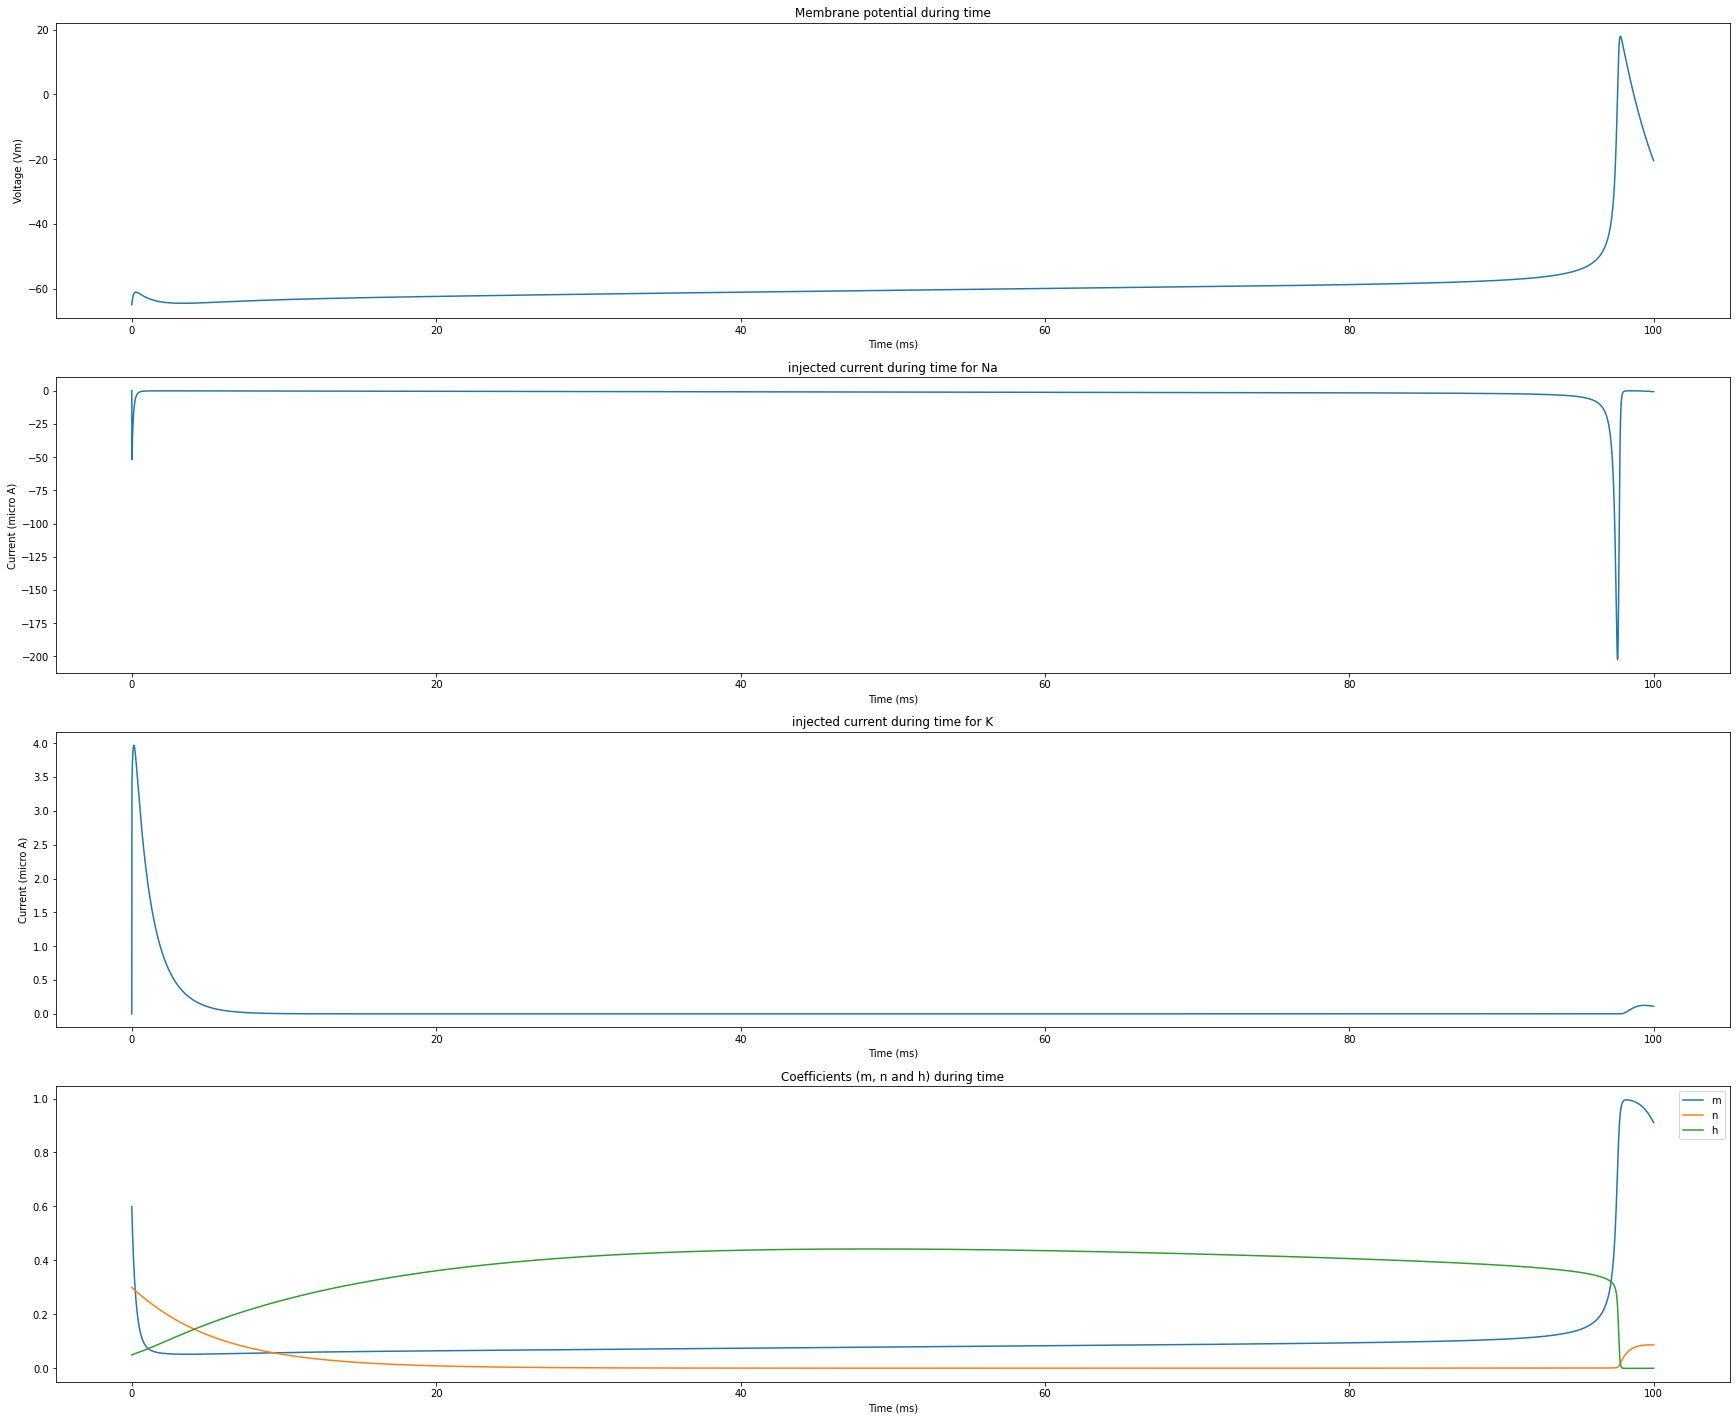

width is 2.12ms


In [3]:
hh = HH()
d = hh.model(I=0.385, mode='const')
hh.plot_results(d[0], d[1], d[2], d[3], d[4], d[5], d[-1])

### I = 1

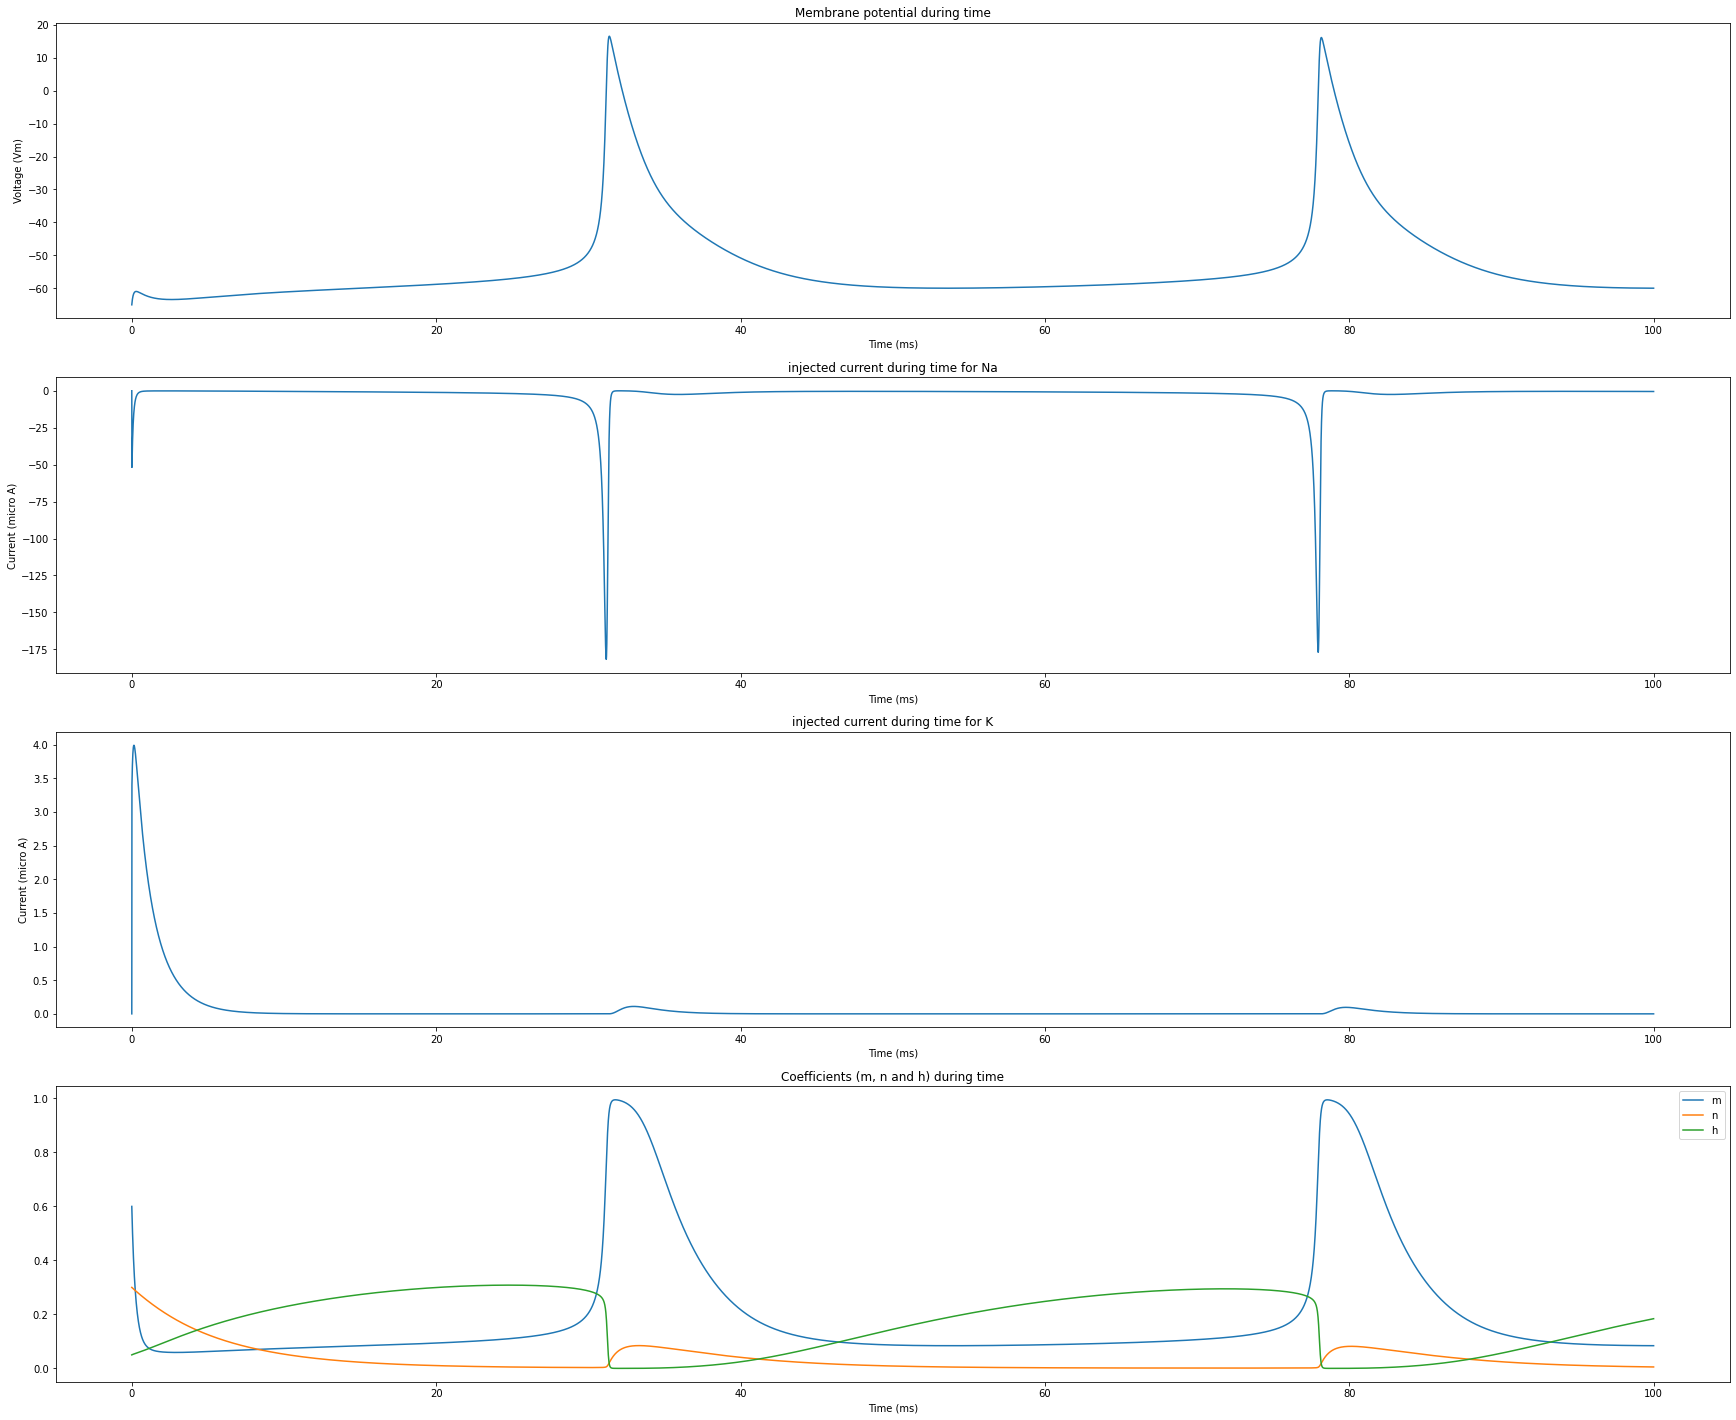

width is 95.62ms


In [4]:
hh = HH()
d = hh.model(I=1, mode='const')
hh.plot_results(d[0], d[1], d[2], d[3], d[4], d[5], d[-1])

## 2. increase the sodium conductance further

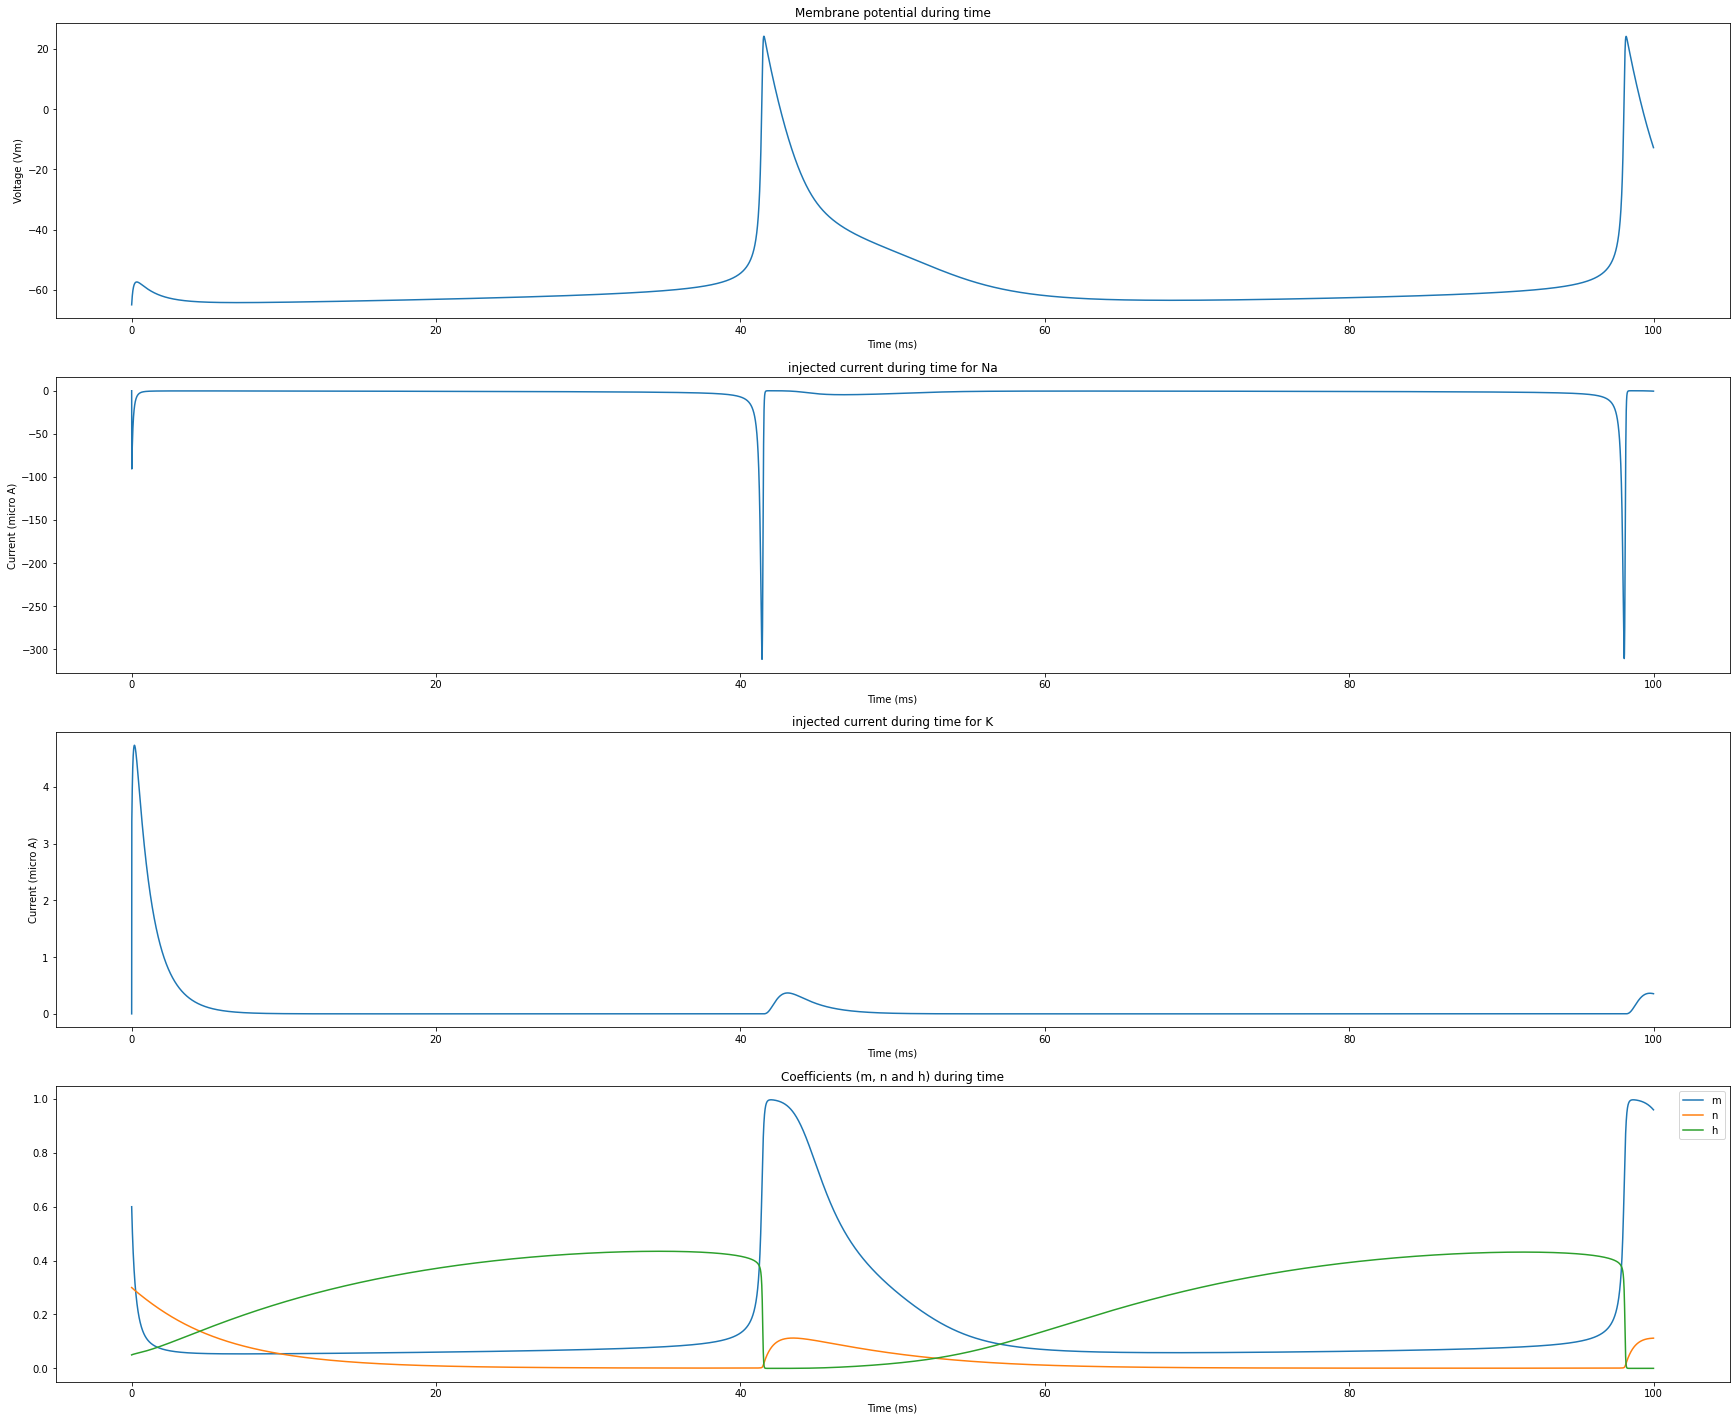

width is 115.72ms


In [5]:
hh = HH(gNa0=70)
d = hh.model(I=0, mode='const')
hh.plot_results(d[0], d[1], d[2], d[3], d[4], d[5], d[-1])

# Simulations Questions

## 1.

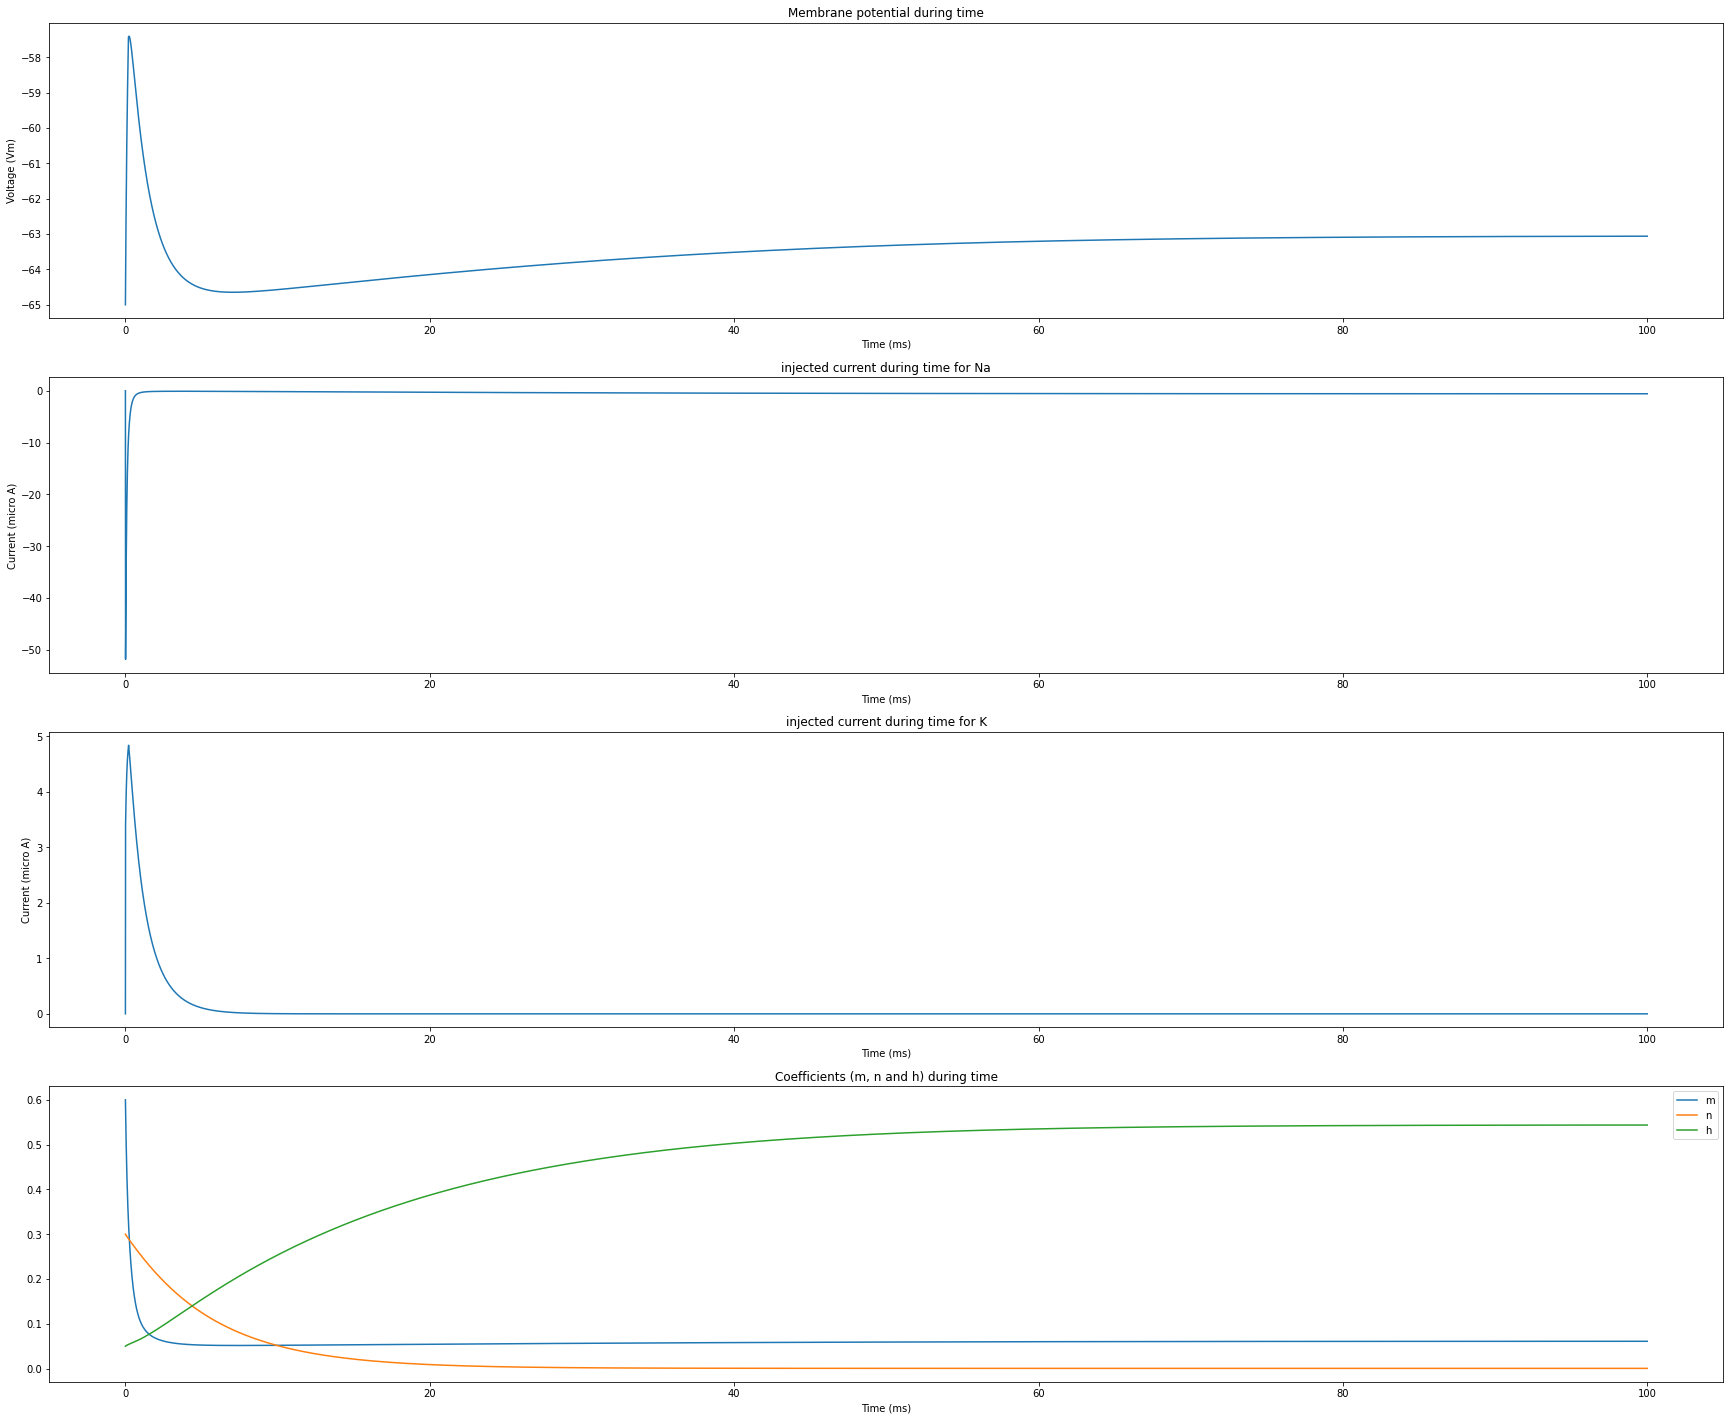

width is 0ms


In [6]:
hh = HH()
d = hh.model(I=20)
hh.plot_results(d[0], d[1], d[2], d[3], d[4], d[5], d[-1])

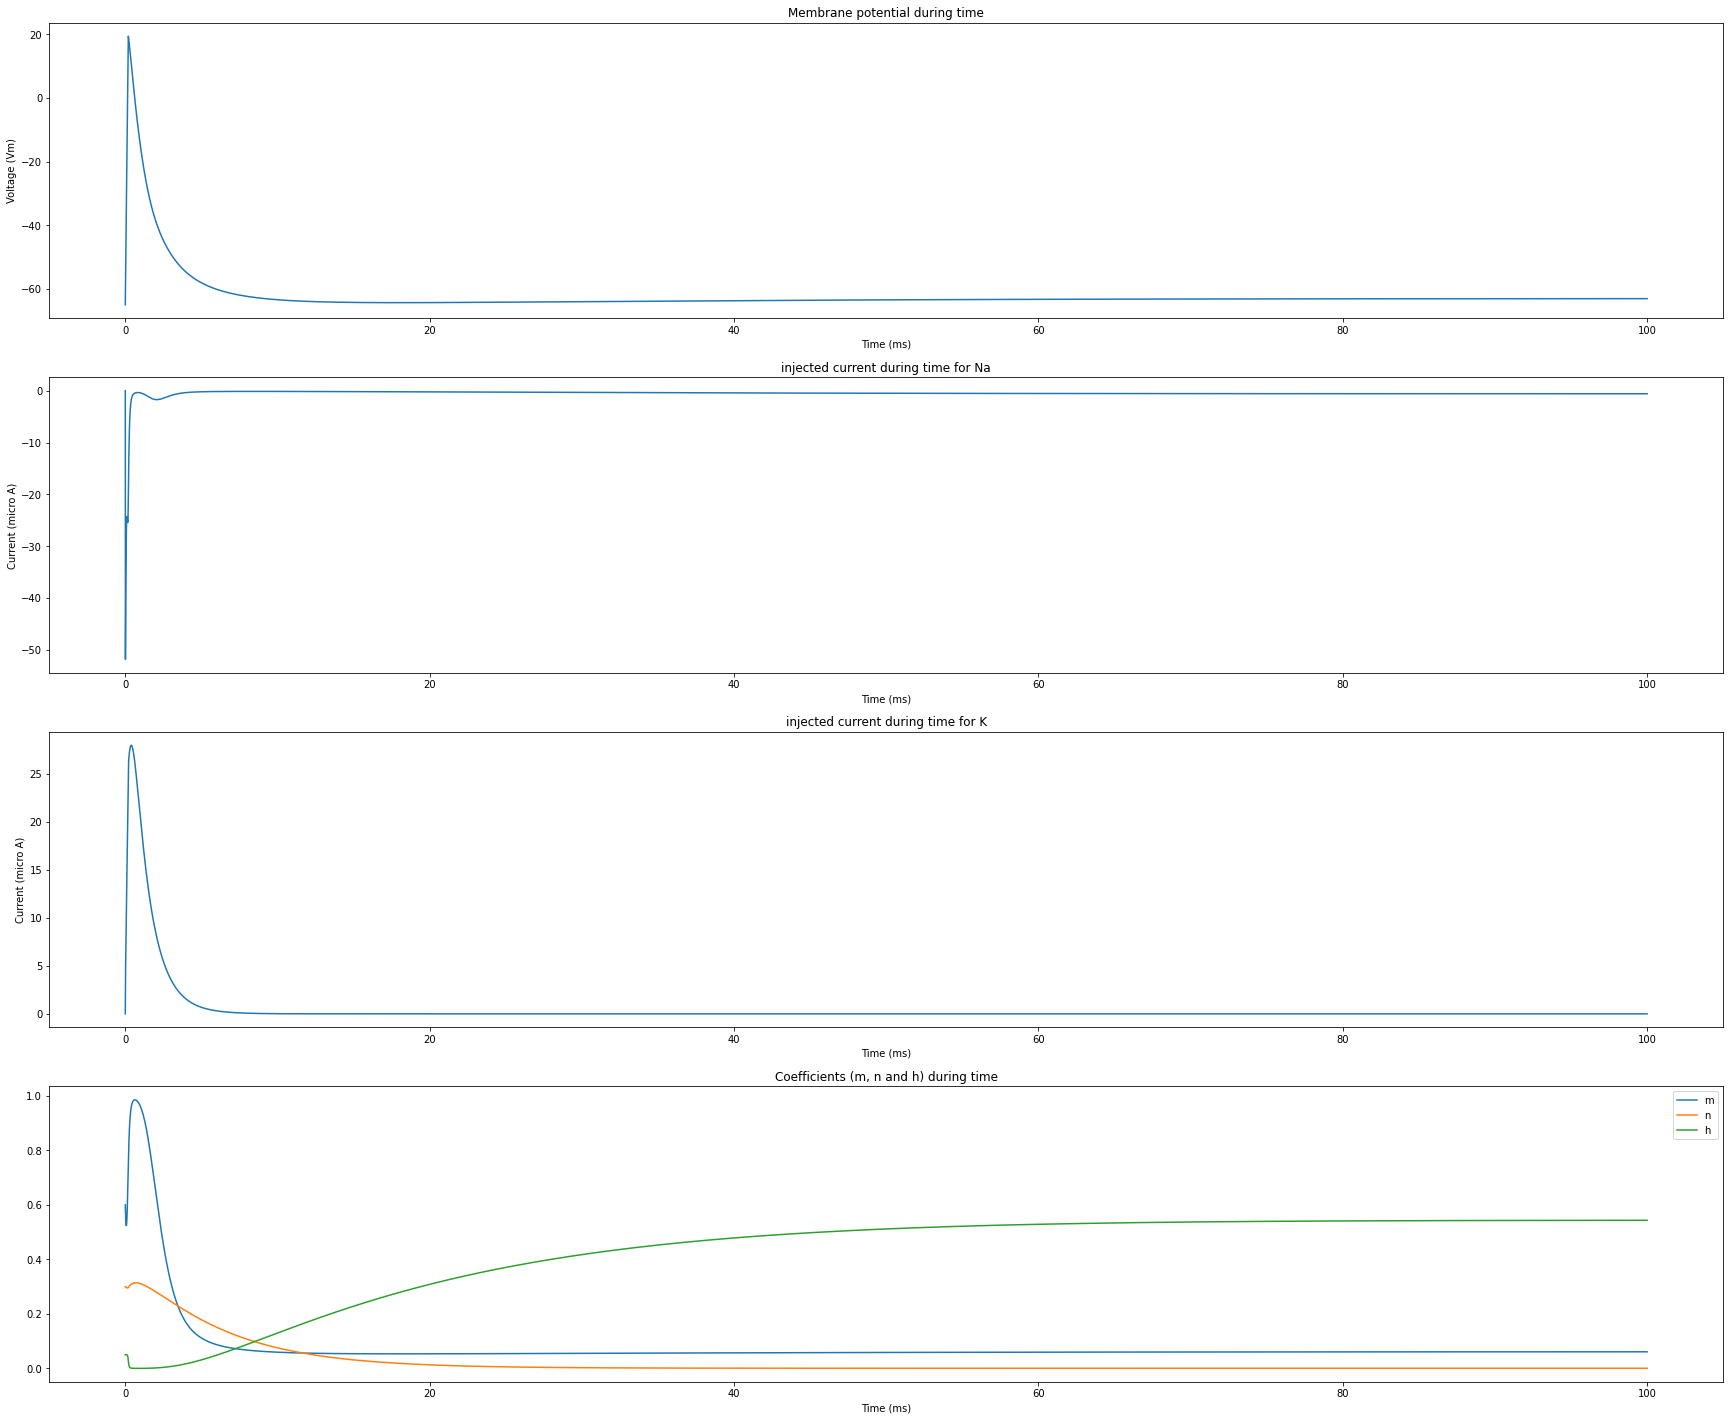

width is 0.9ms


In [7]:
hh = HH()
d = hh.model(I=420)
hh.plot_results(d[0], d[1], d[2], d[3], d[4], d[5], d[-1])

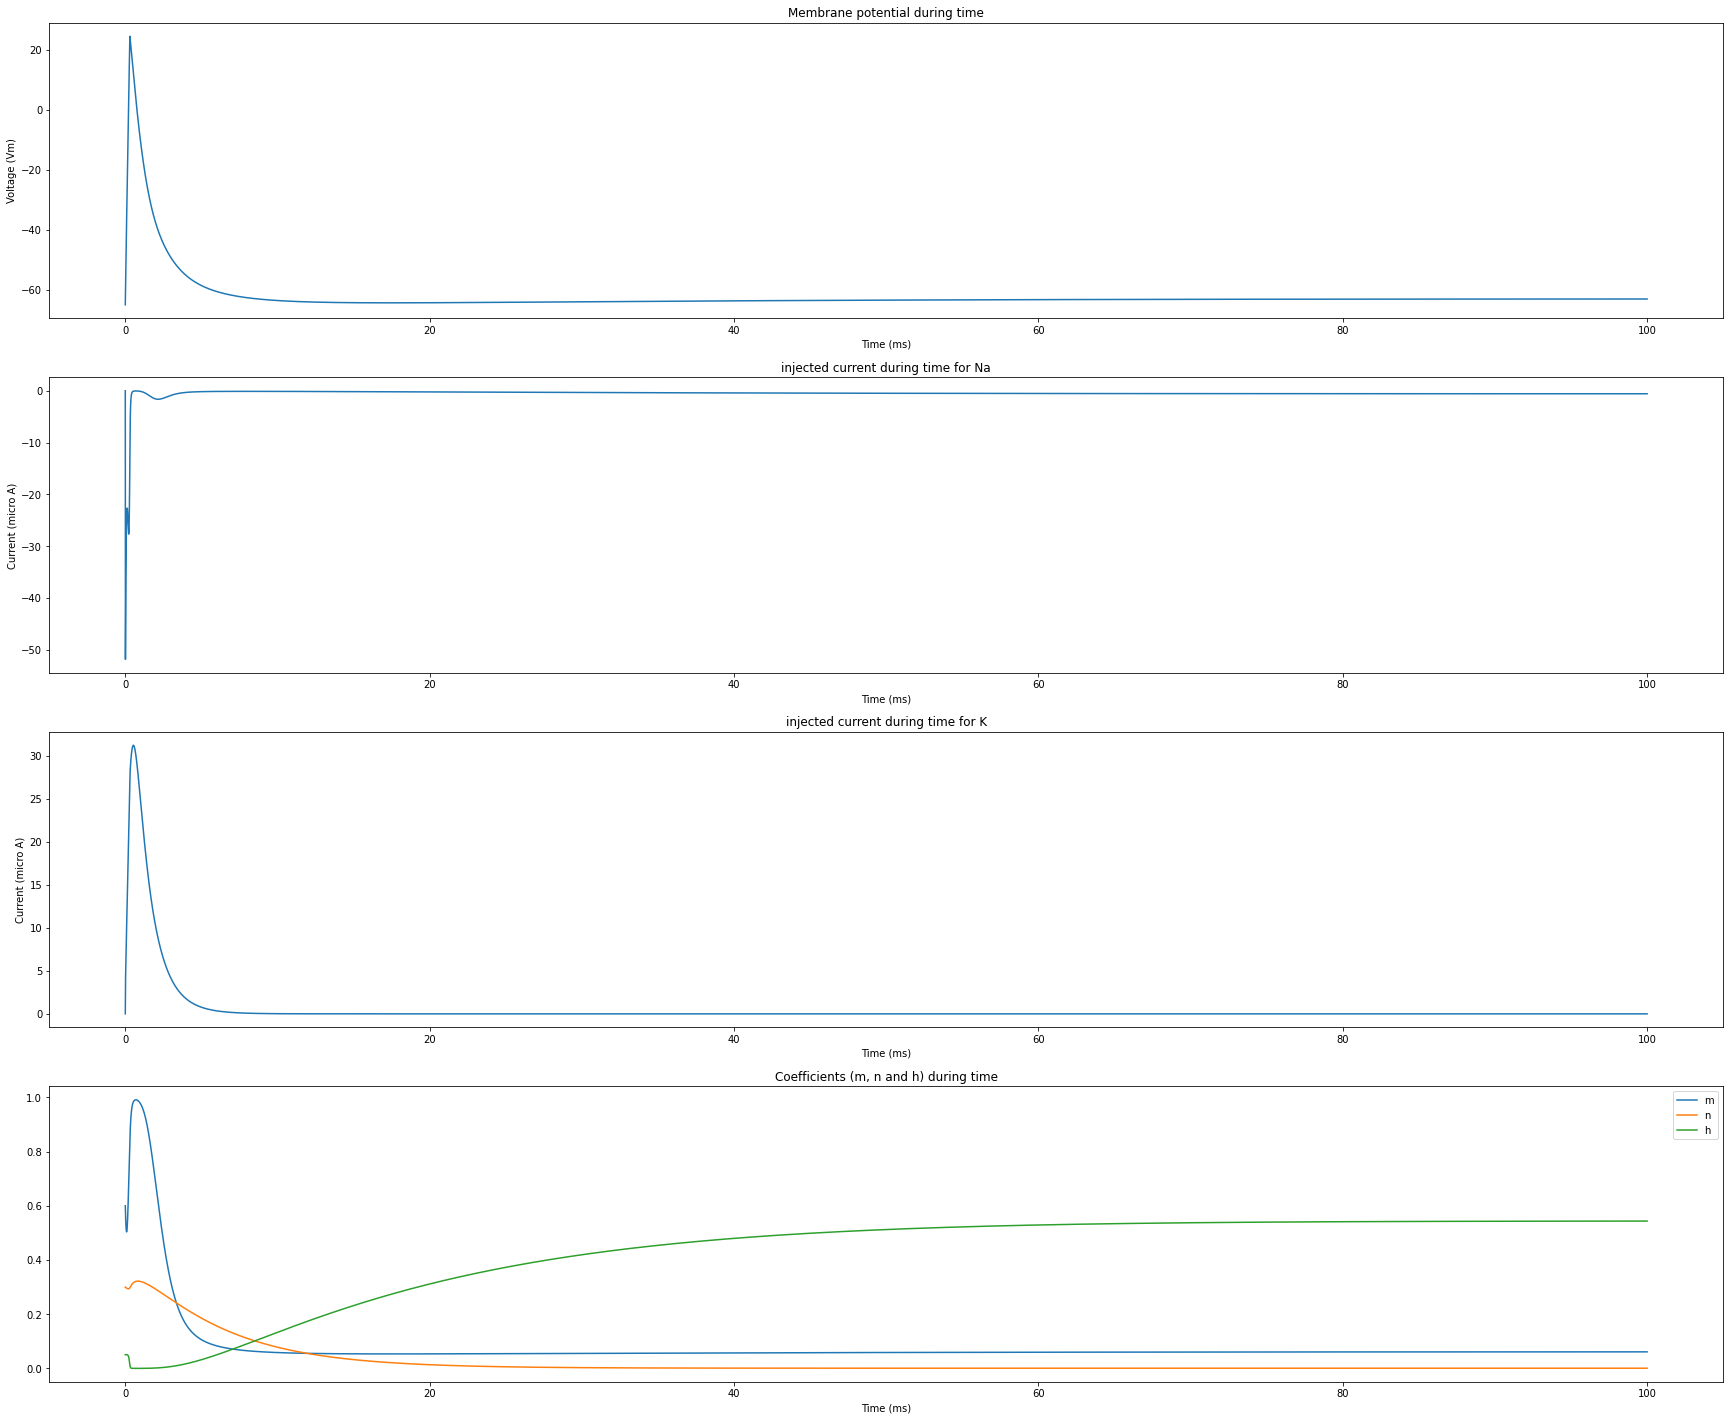

width is 1.08ms


In [8]:
ext_list = [0.3, 0.8, 1.5, 3, 5]
hh = HH()
d1 = hh.model(I=300, finish_pulse=0.3)
hh.plot_results(d1[0], d1[1], d1[2], d1[3], d1[4], d1[5], d1[-1])           
        

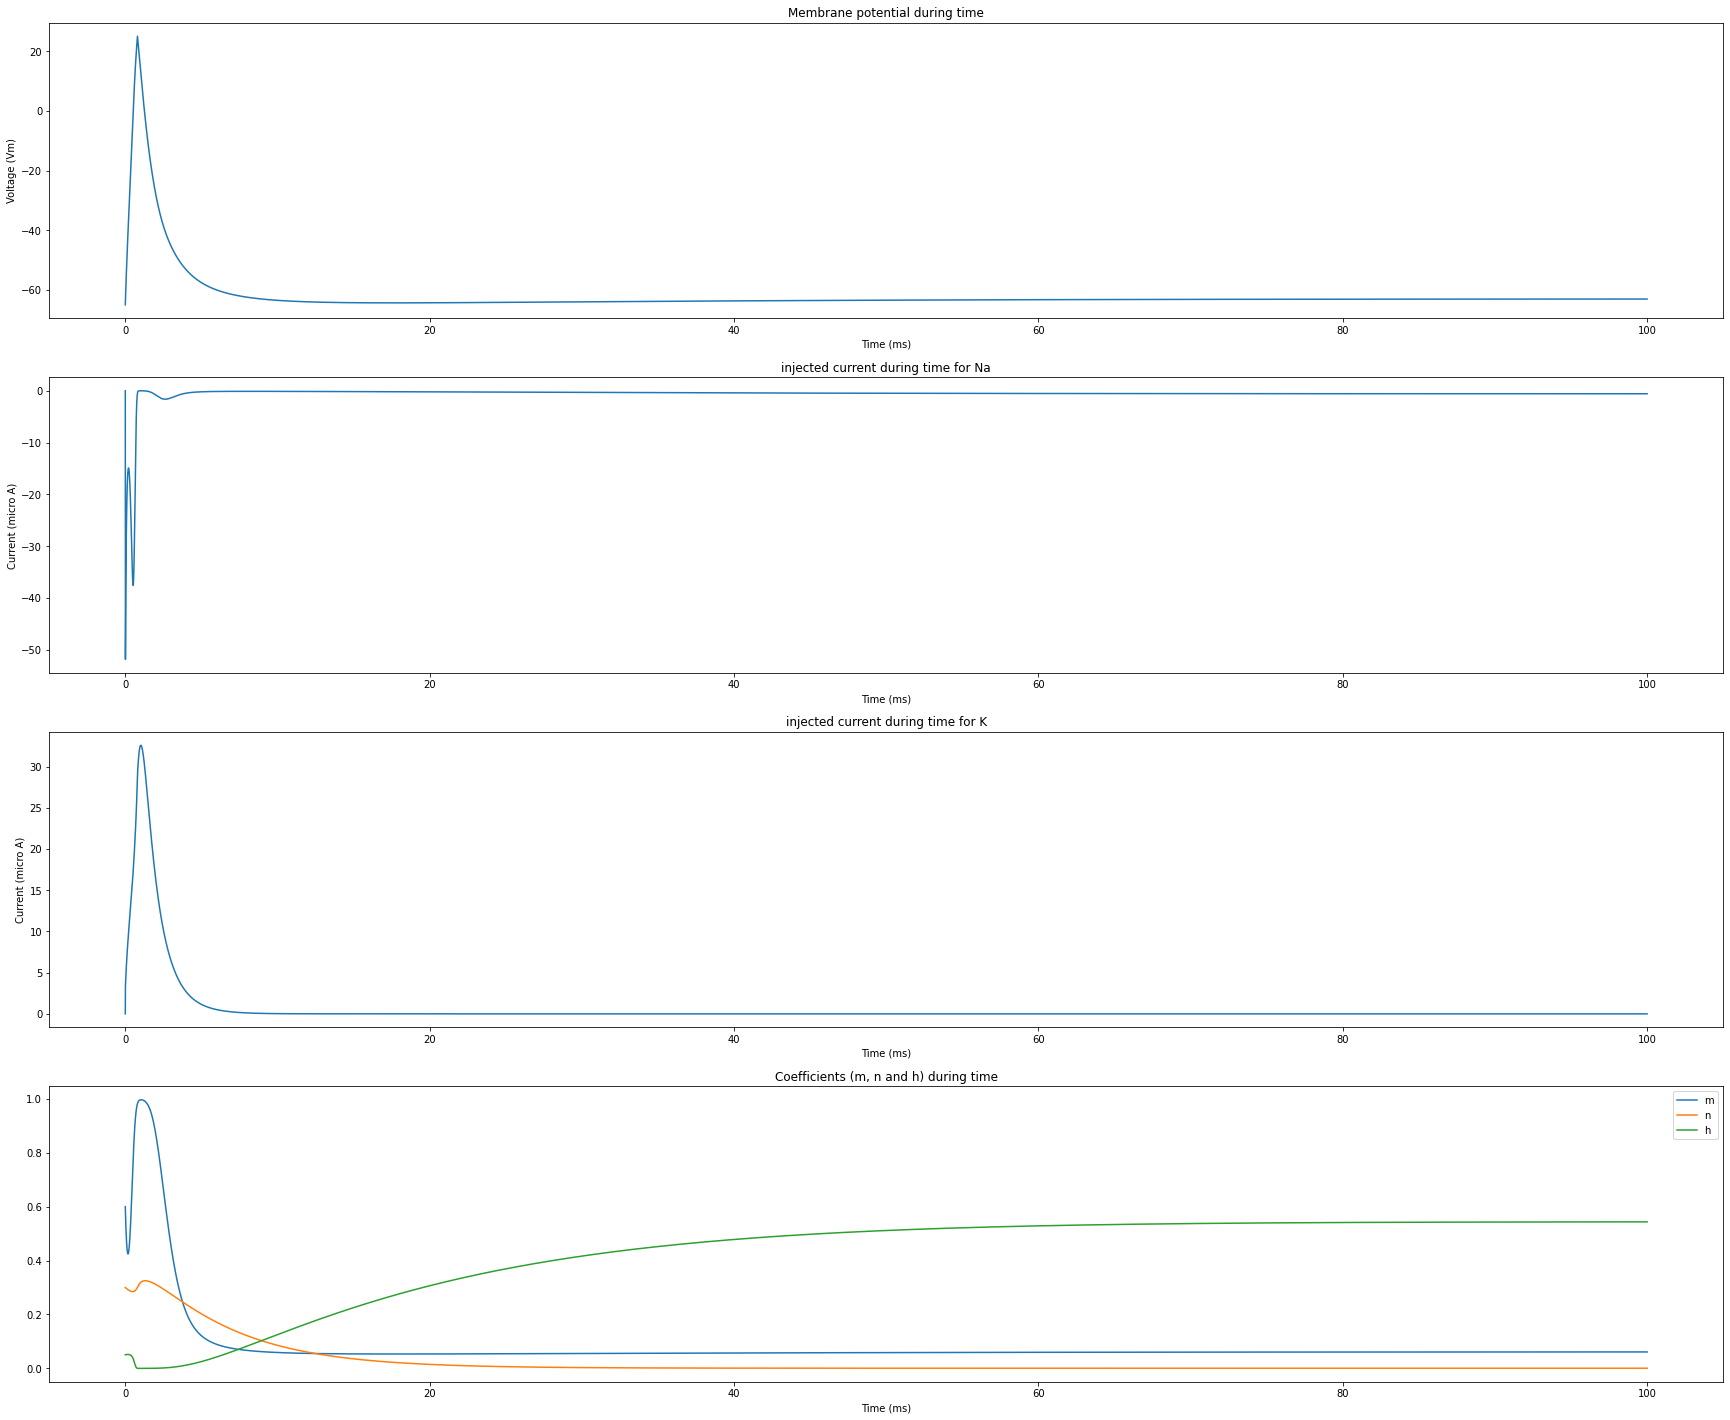

width is 1.44ms


In [13]:

hh = HH()
d2 = hh.model(I=120, finish_pulse=0.8)
hh.plot_results(d2[0], d2[1], d2[2], d2[3], d2[4], d2[5], d2[-1])           
        

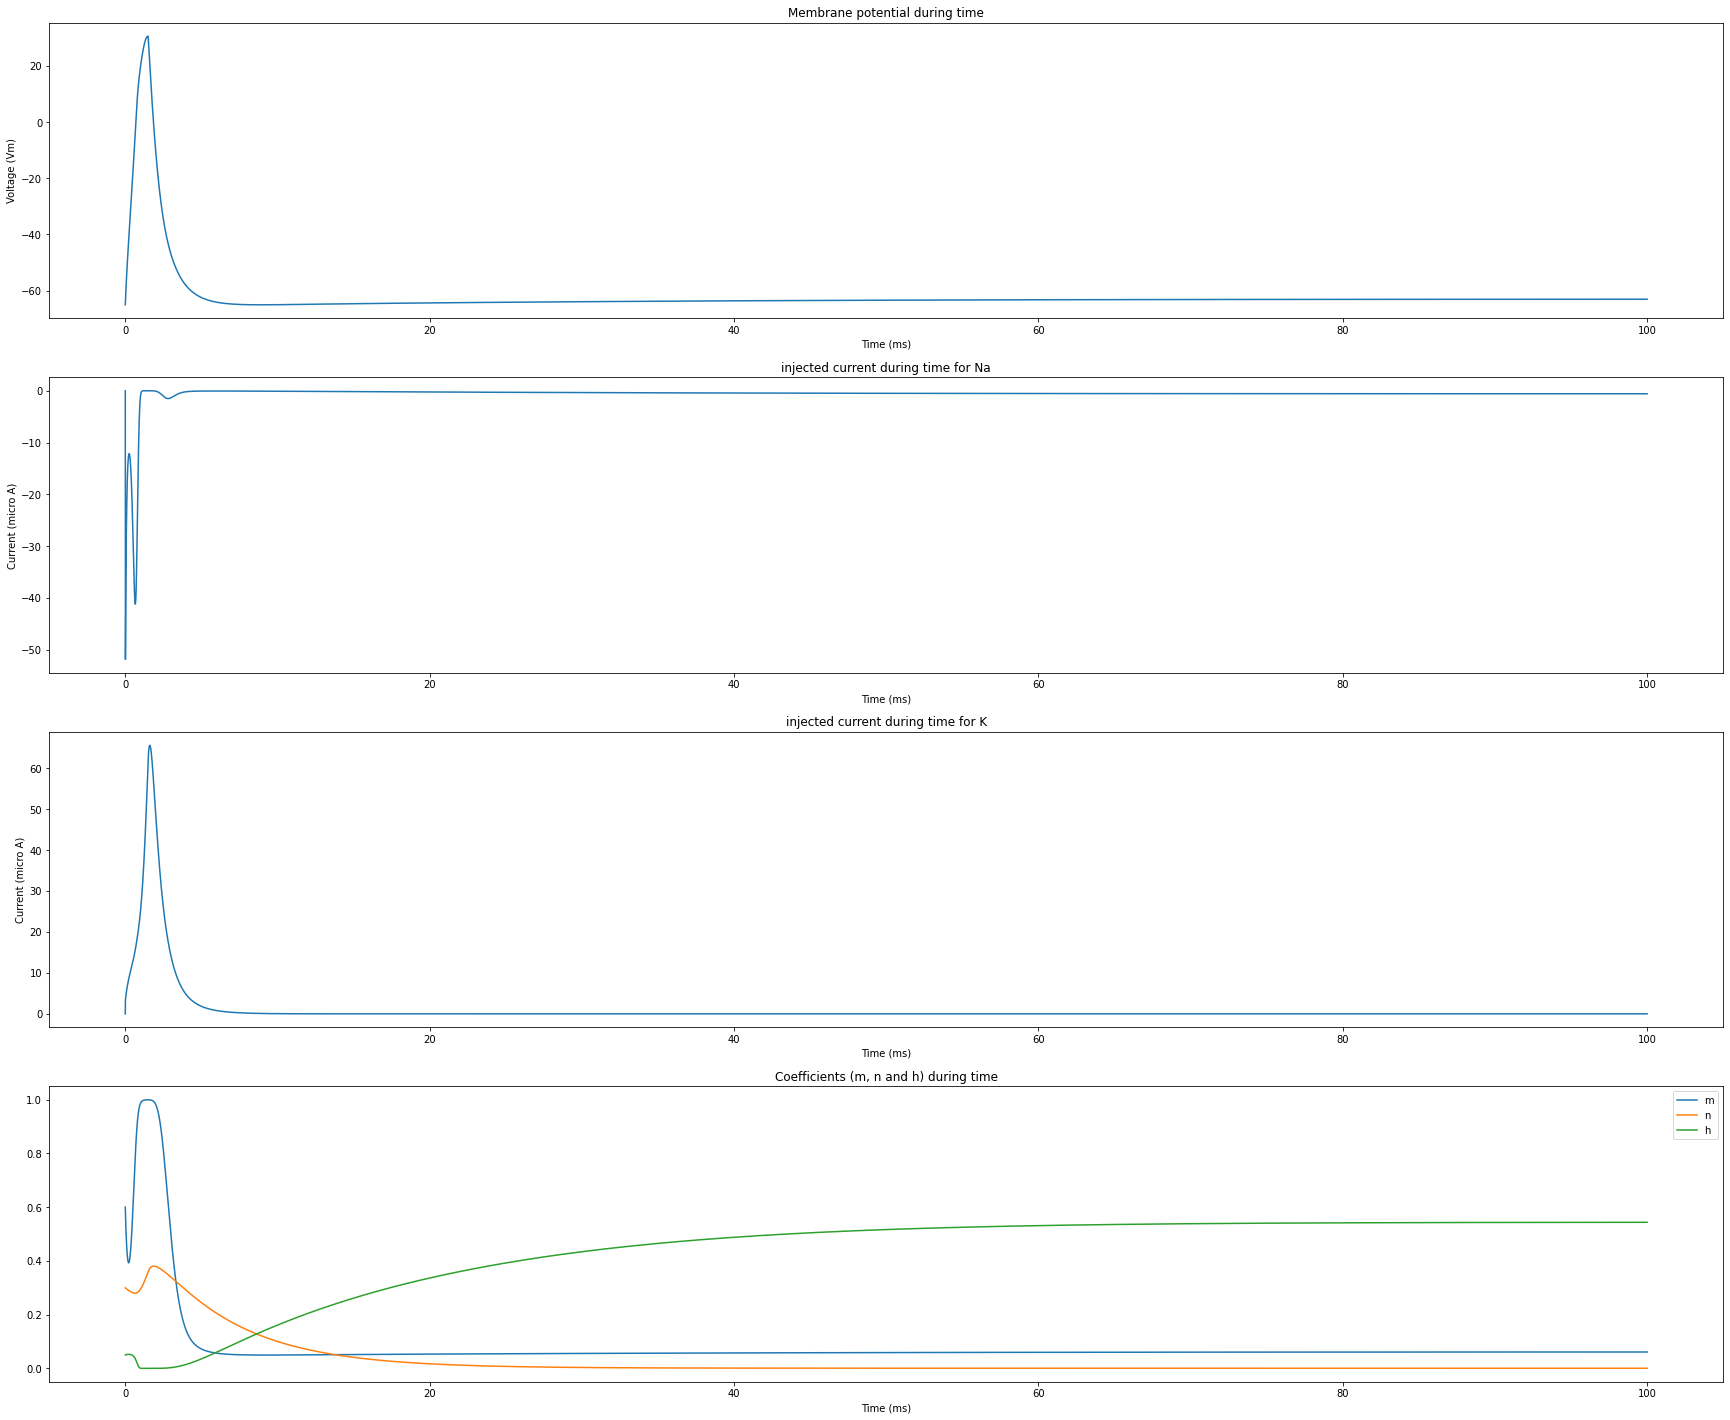

width is 2.32ms


In [16]:
ext_list = [0.3, 0.5, 0.8, 1, 2]
hh = HH()
d3 = hh.model(I=90, finish_pulse=1.5)
hh.plot_results(d3[0], d3[1], d3[2], d3[3], d3[4], d3[5], d3[-1])           
        

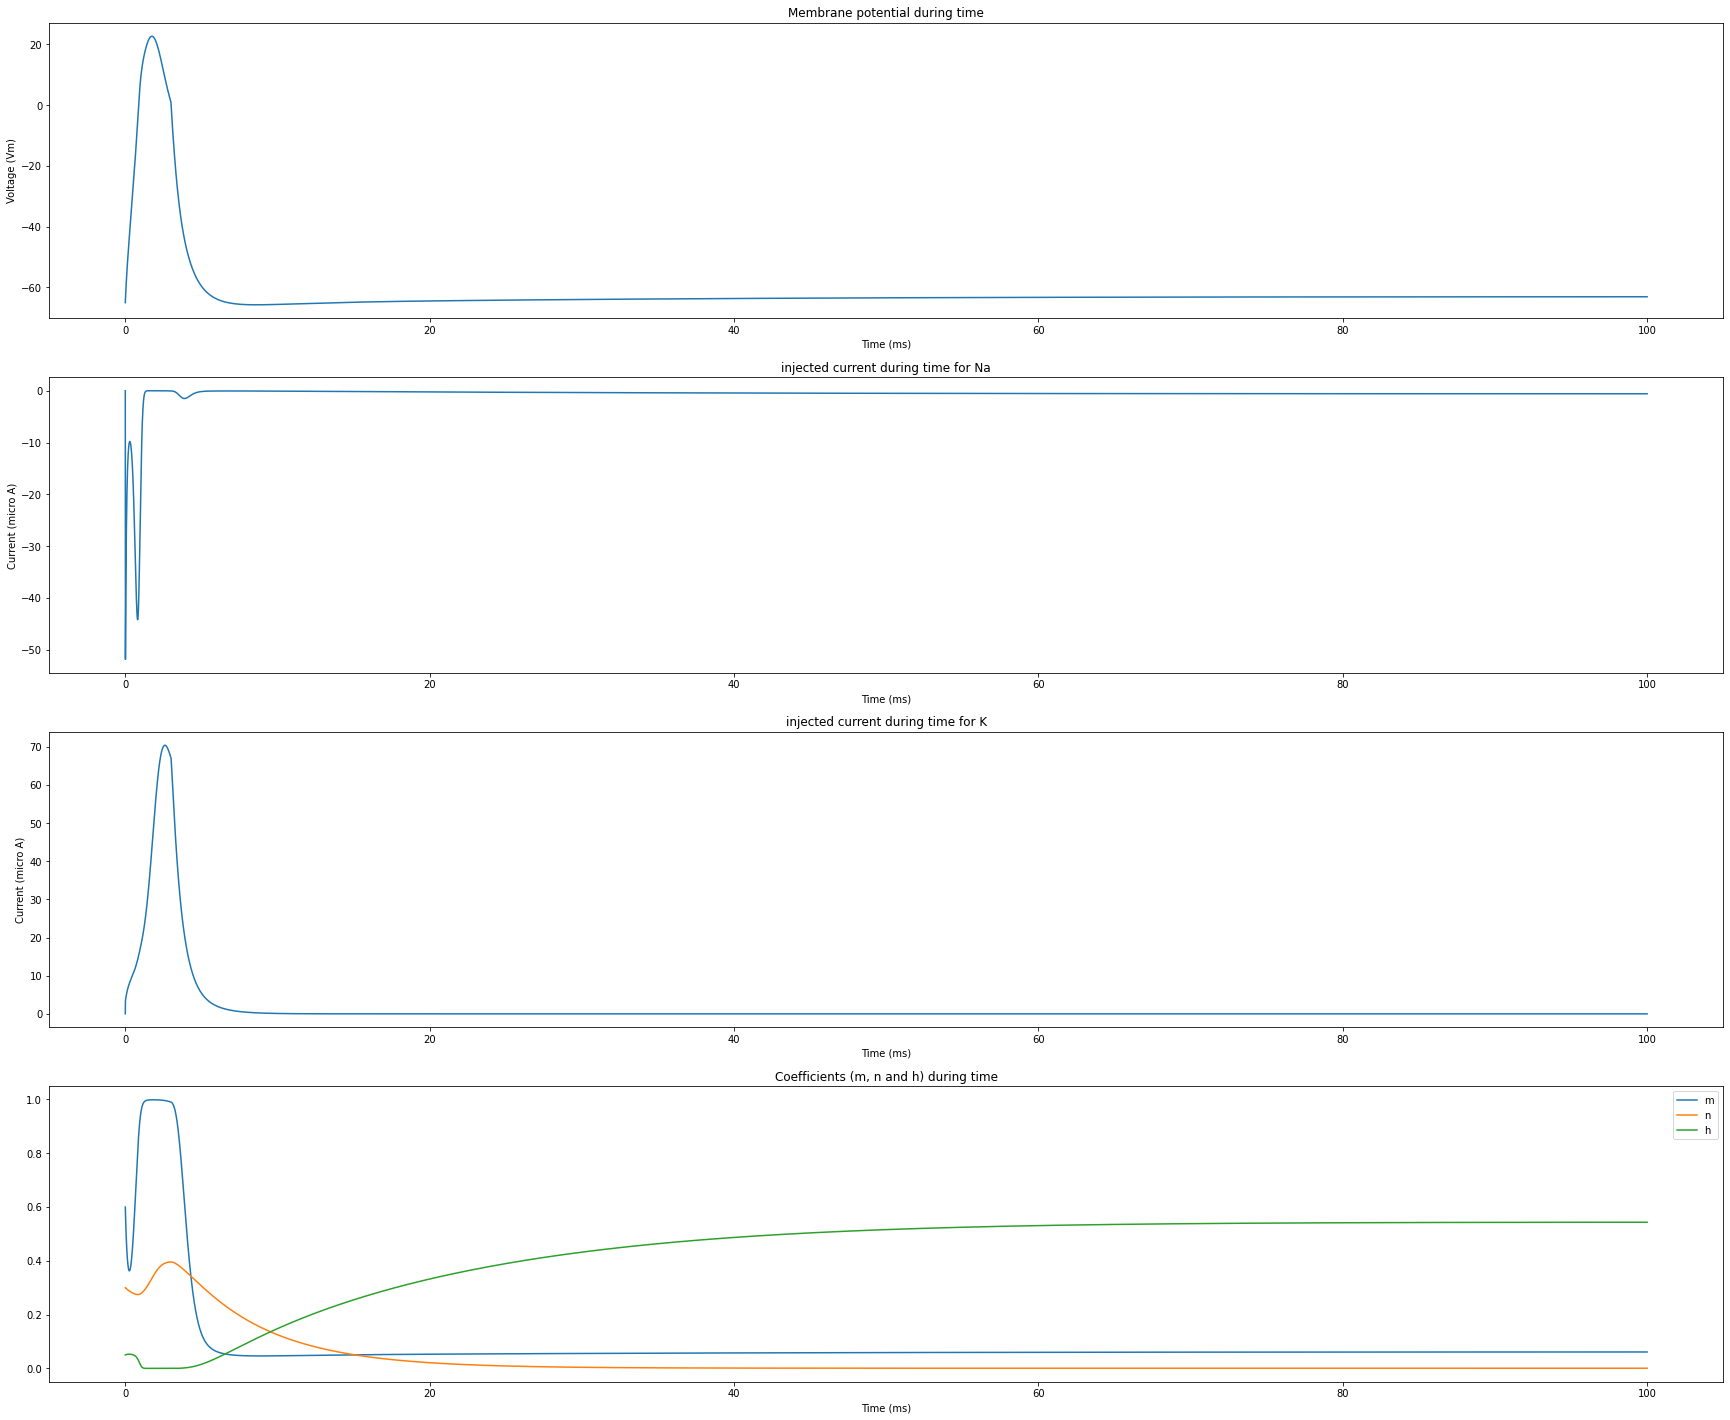

width is 4.26ms


In [19]:
ext_list = [0.3, 0.5, 0.8, 1, 2]
hh = HH()
d4 = hh.model(I=70, finish_pulse=3)
hh.plot_results(d4[0], d4[1], d4[2], d4[3], d4[4], d4[5], d4[-1])           
        

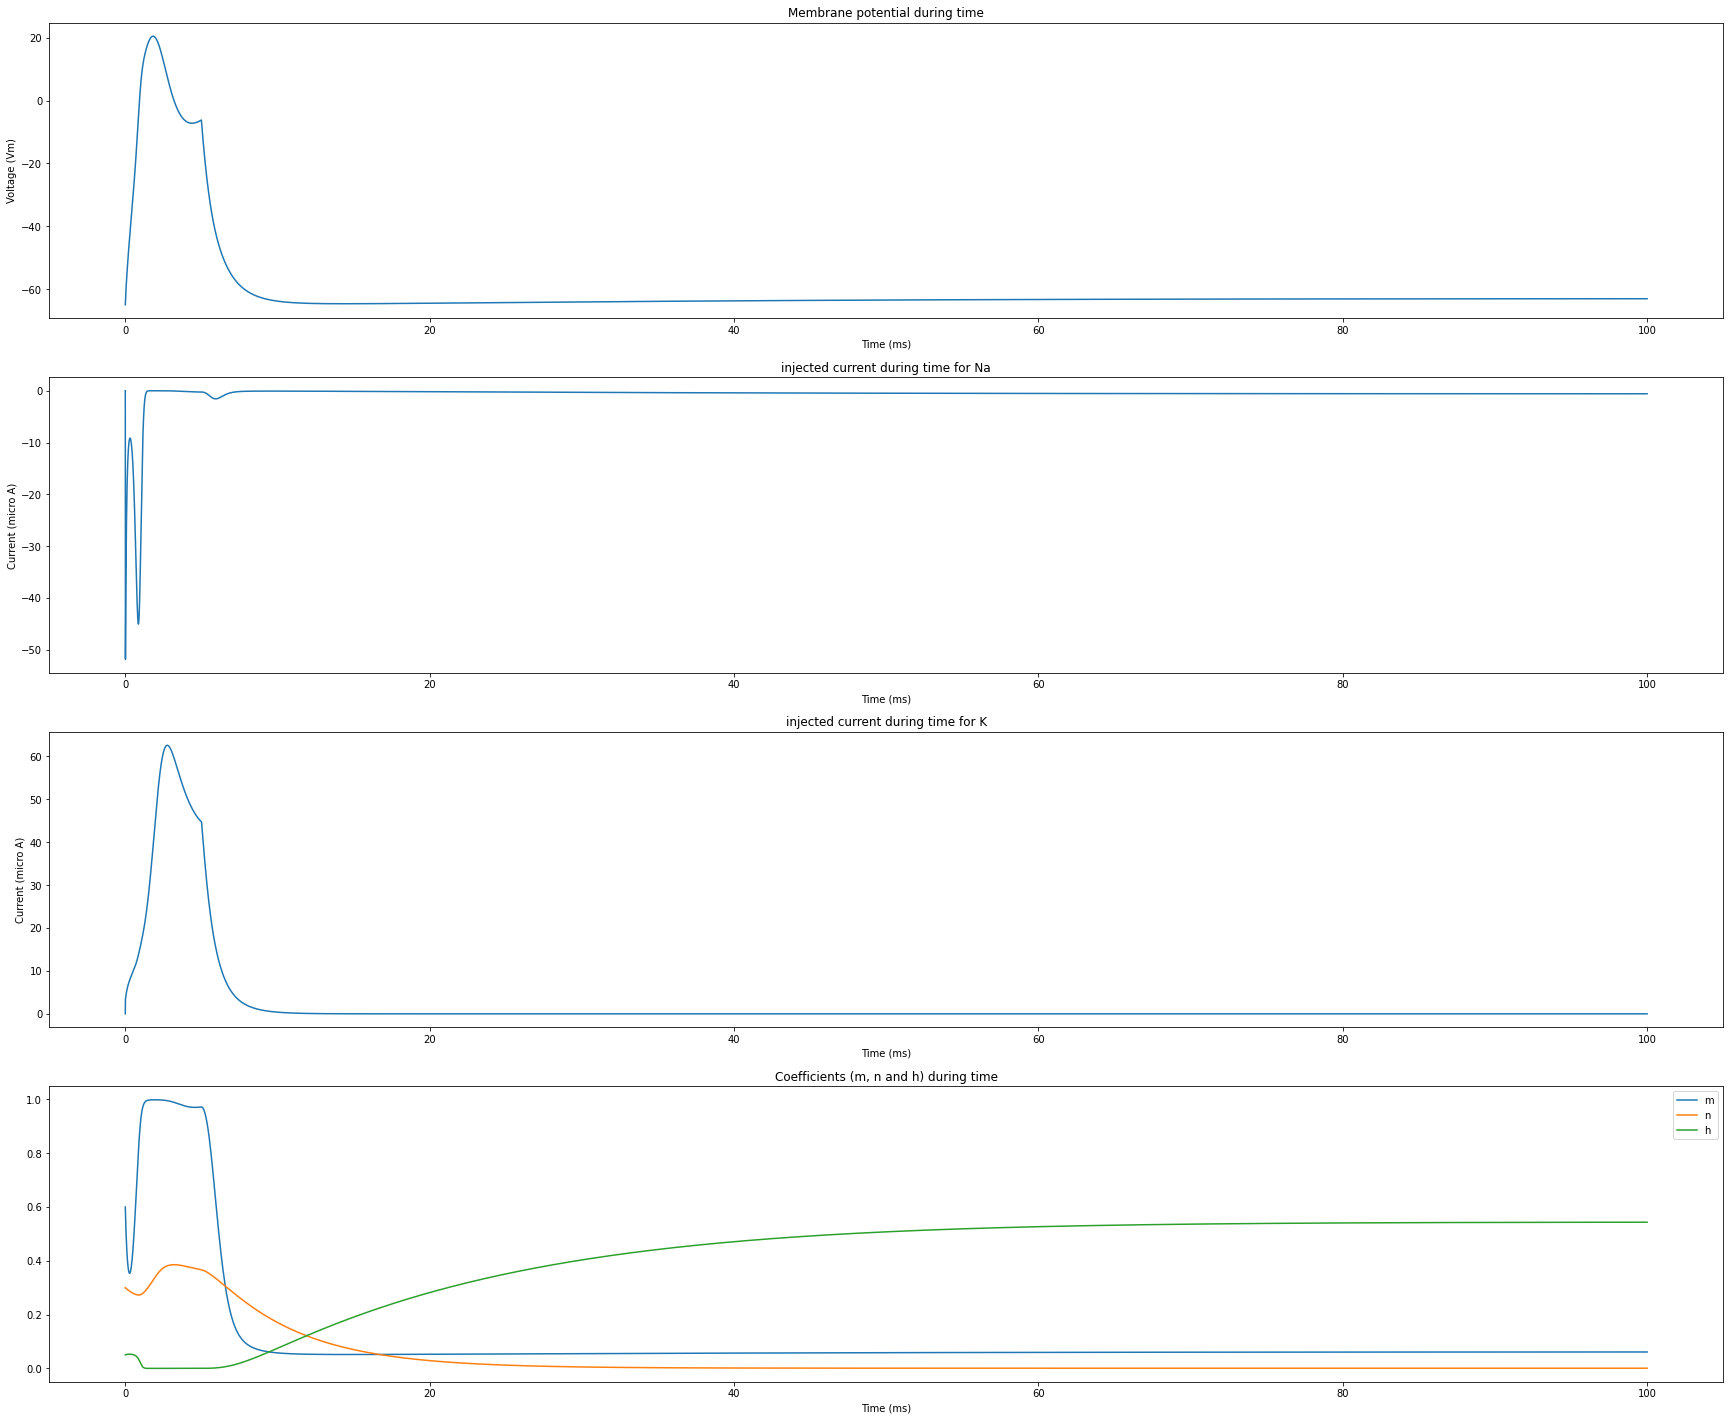

width is 4.5200000000000005ms


In [23]:
ext_list = [0.3, 0.5, 0.8, 1, 2]
hh = HH()
d5 = hh.model(I=65, finish_pulse=5)
hh.plot_results(d5[0], d5[1], d5[2], d5[3], d5[4], d5[5], d5[-1])           
        

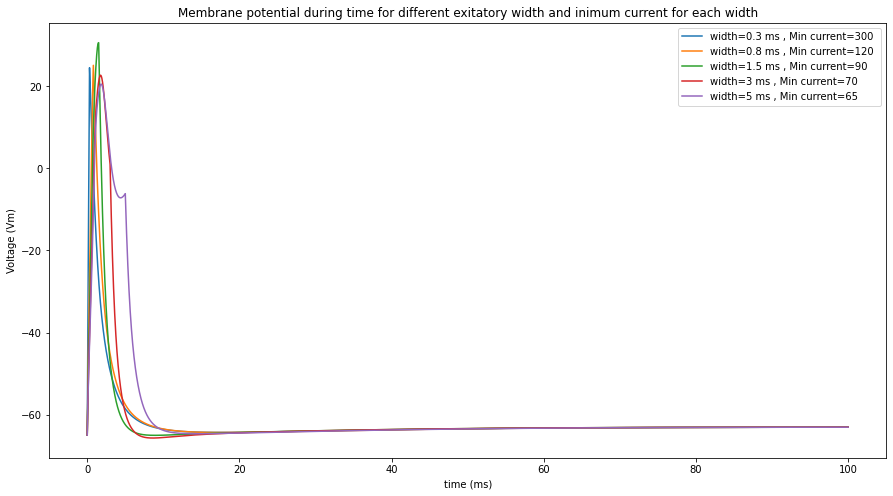

In [25]:
ext_list = [0.3, 0.5, 0.8, 1, 2]
      
plt.figure(figsize=(15, 8))
plt.plot(hh.range, d1[0], label = f'width=0.3 ms , Min current=300 ')
plt.plot(hh.range, d2[0], label = f'width=0.8 ms , Min current=120 ')
plt.plot(hh.range, d3[0], label = f'width=1.5 ms , Min current=90 ')
plt.plot(hh.range, d4[0], label = f'width=3 ms , Min current=70 ')
plt.plot(hh.range, d5[0], label = f'width=5 ms , Min current=65 ')
plt.xlabel('time (ms)')
plt.ylabel('Voltage (Vm)')
plt.title('Membrane potential during time for different exitatory width and inimum current for each width')
plt.legend()
plt.show()





## 4.

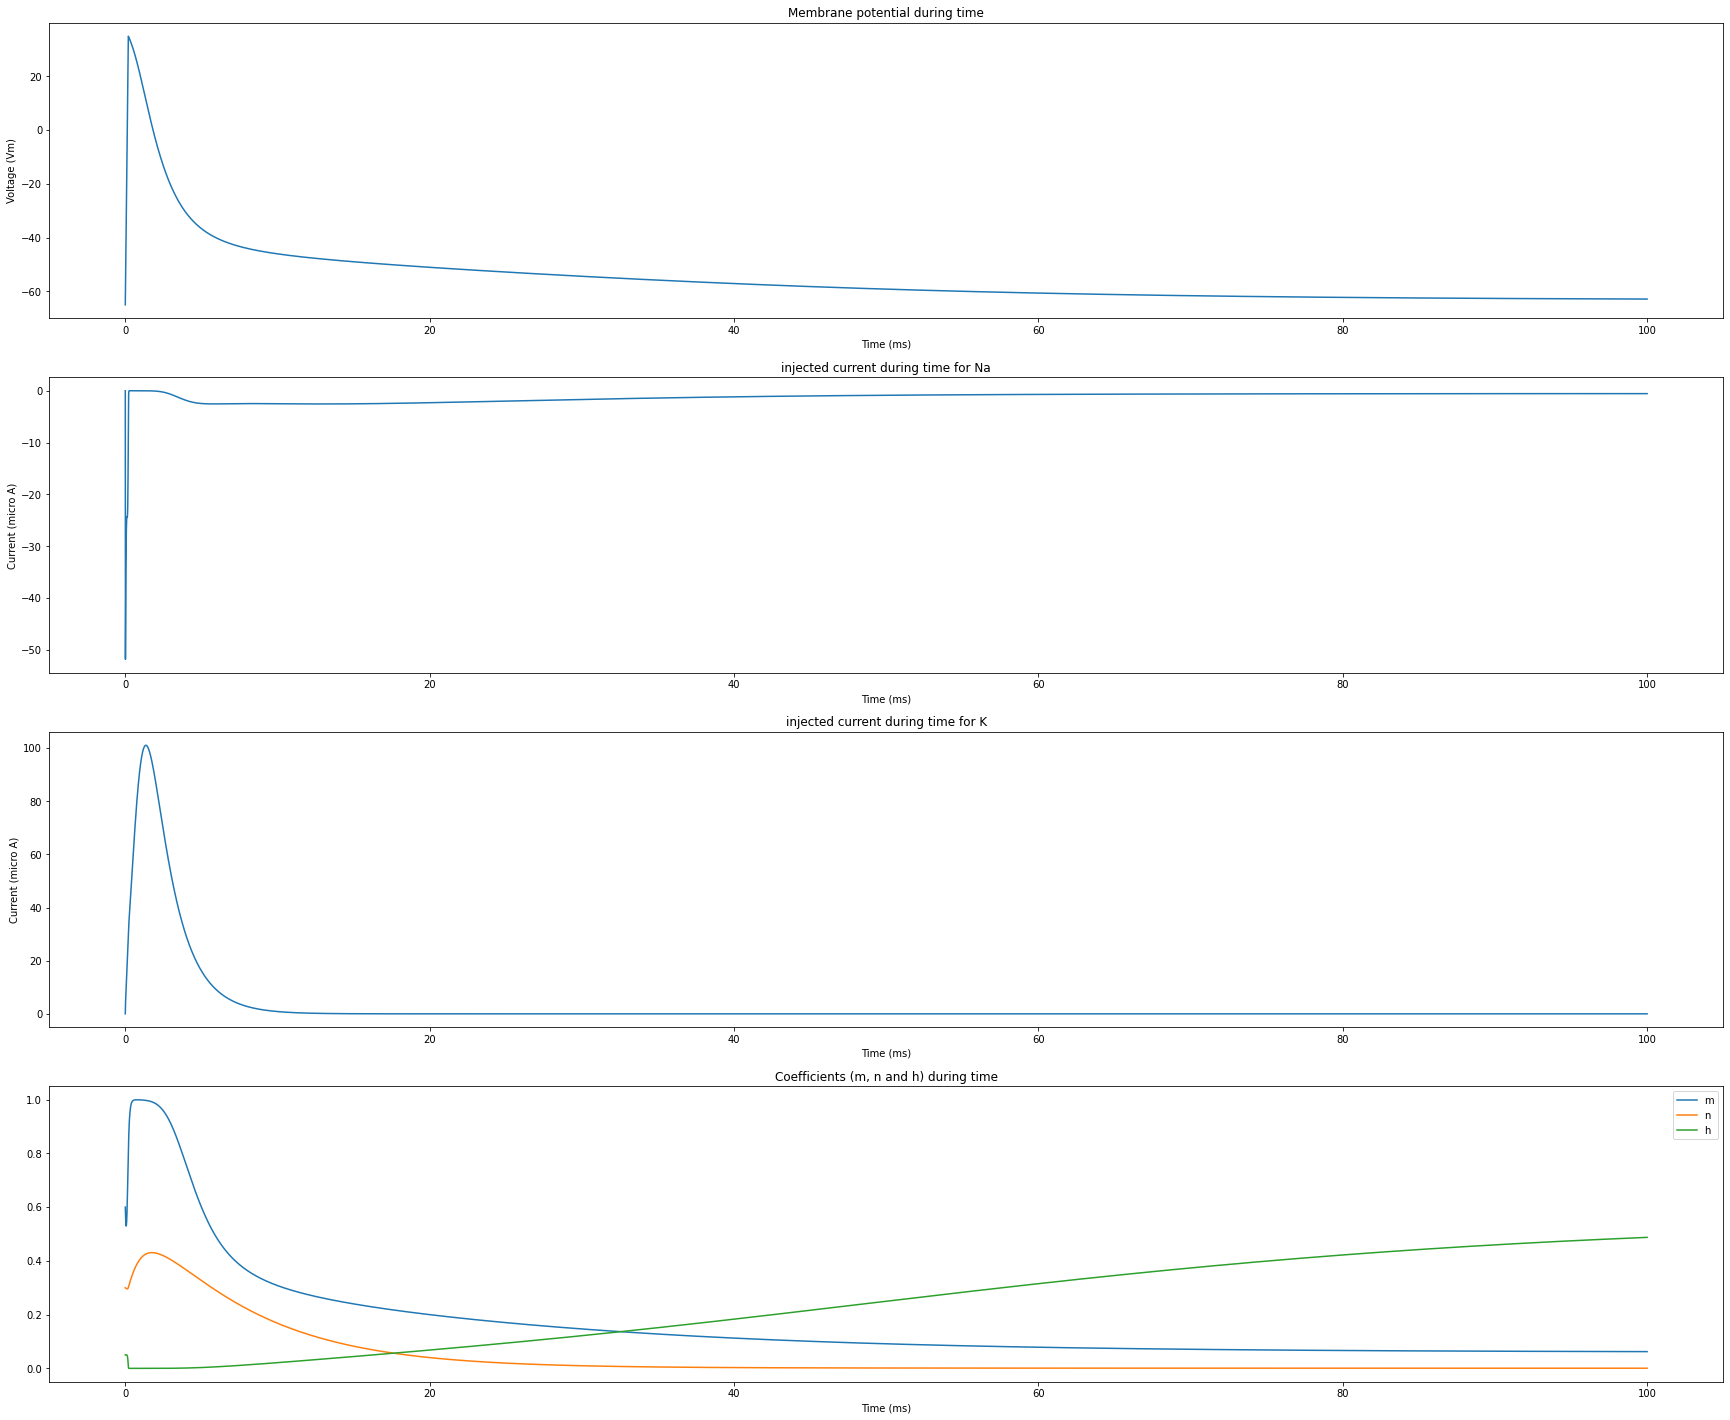

width is 3.38ms


In [61]:

hh = HH(Cm=5)
d5 = hh.model(I=2500)
hh.plot_results(d5[0], d5[1], d5[2], d5[3], d5[4], d5[5], d5[-1])         

## 5. 

In [62]:
class HH:
    def __init__(self, Vm=-65, n0=0.3, h0=0.05, m0=0.6, ENa=55, EK=-77, Cm=1, gK0=35, gNa0=40, gL=0.3, EL=-65 , time=100, dt=0.01):
        self.Vm = Vm
        self.n0 = n0
        self.m0 = m0
        self.h0 = h0
        self.ENa = ENa
        self.EK = EK
        self.Cm = Cm
        self.gK0 = gK0
        self.gNa0 = gNa0
        self.gL = gL
        self.EL = EL
        self.time = time
        self.dt = dt

        self.range = np.arange(0, time, dt)

    def alpha_n(self, V): return 0.02*(V-25.0)/(1.0 - sp.exp(-(V-25.0) / 9.0))
    def beta_n(self, V):  return -0.002*((V-25)/(1.0-sp.exp((V-25)/9)))

    def alpha_m(self, V): return 0.182*(V + 35)/(1-sp.exp(-(V+35) / 9.0))
    def beta_m(self, V):  return -0.124*((V+35)/ (1 - sp.exp((V+35) / 9.0)))

    def alpha_h(self, V): return 0.25 * sp.exp(-(V+90)/12)
    def beta_h(self, V):  return 0.25* (sp.exp((V+62)/6))/(sp.exp((V+90)/12))

    def model(self, mode='pulse', I=20, second_I=40, finish_pulse_one = 0.2, start_pulse_two=15):
        Vlist = [self.Vm]
        gNaList = [self.gNa0]
        gKList = [self.gK0]
        m_list = [self.m0]
        n_list = [self.n0]
        h_list = [self.h0]
        INaList = [0]
        IKList = [0]
        Ilist = [I if self.range[step] < finish_pulse_one else 0 for step in range(self.range.size)]
        Ilist = [second_I if self.range[step] > start_pulse_two else Ilist[step] for step in range(self.range.size)]
        for t in range(len(self.range)-1):
            gNa  = self.gNa0*m_list[-1]**3* h_list[-1]            
            gK   = self.gK0*n_list[-1]**4 
            INa = gNa* (Vlist[-1] - self.ENa)
            IK = gK * (Vlist[-1] - self.EK)
            IL = self.gL * (Vlist[-1] - self.EL)
            dv = (Ilist[t] - INa - IK - IL)/self.Cm
            dm = self.alpha_m(Vlist[-1])*(1.0-m_list[-1]) - self.beta_m(Vlist[-1])*m_list[-1]
            dh = self.alpha_h(Vlist[-1])*(1.0-h_list[-1])- self.beta_h(Vlist[-1])*h_list[-1]
            dn = self.alpha_n(Vlist[-1])*(1.0-n_list[-1])- self.beta_n(Vlist[-1])*n_list[-1]
            V = Vlist[-1] + dv*self.dt
            m = m_list[-1] + dm*self.dt
            h = h_list[-1] + dh*self.dt
            n = n_list[-1] + dn*self.dt
            Vlist.append(V)
            m_list.append(m)
            n_list.append(n)
            h_list.append(h)
            INaList.append(INa)
            IKList.append(IK)
        
        tmp = np.where(np.array(Vlist) >= 0)[0]
        if len(tmp)>1:
            width = 2*(tmp[-1]-tmp[0])*0.01
        else:
            width=0
        return Vlist,m_list,n_list,h_list,INaList,IKList, width

    def plot_results(self, vlist, m, n, h, Ina, Ik):
        fig = plt.figure(figsize=(30, 20))
        ax = plt.subplot(411)
        ax.set_title("Membrane potential during time")
        ax.plot(self.range,vlist, label='membrane potential')
        ax.set_ylabel('Voltage (Vm)')
        ax.set_xlabel('Time (ms)')

        ax2 = plt.subplot(412)
        ax2.set_title("injected current during time for Na")
        ax2.plot(self.range, Ina)
        ax2.set_ylabel('Current (micro A)')
        ax2.set_xlabel('Time (ms)')

        ax3 = plt.subplot(413)
        ax3.set_title("injected current during time for K")
        ax3.plot(self.range, Ik)
        ax3.set_ylabel('Current (micro A)')
        ax3.set_xlabel('Time (ms)')

        ax4 = plt.subplot(414)
        ax4.set_title("Coefficients (m, n and h) during time")
        ax4.plot(self.range, m, label='m')
        ax4.plot(self.range, n, label='n')
        ax4.plot(self.range, h, label='h')
        ax4.set_xlabel('Time (ms)')
        ax4.legend()

        plt.legend()
        plt.show()
        


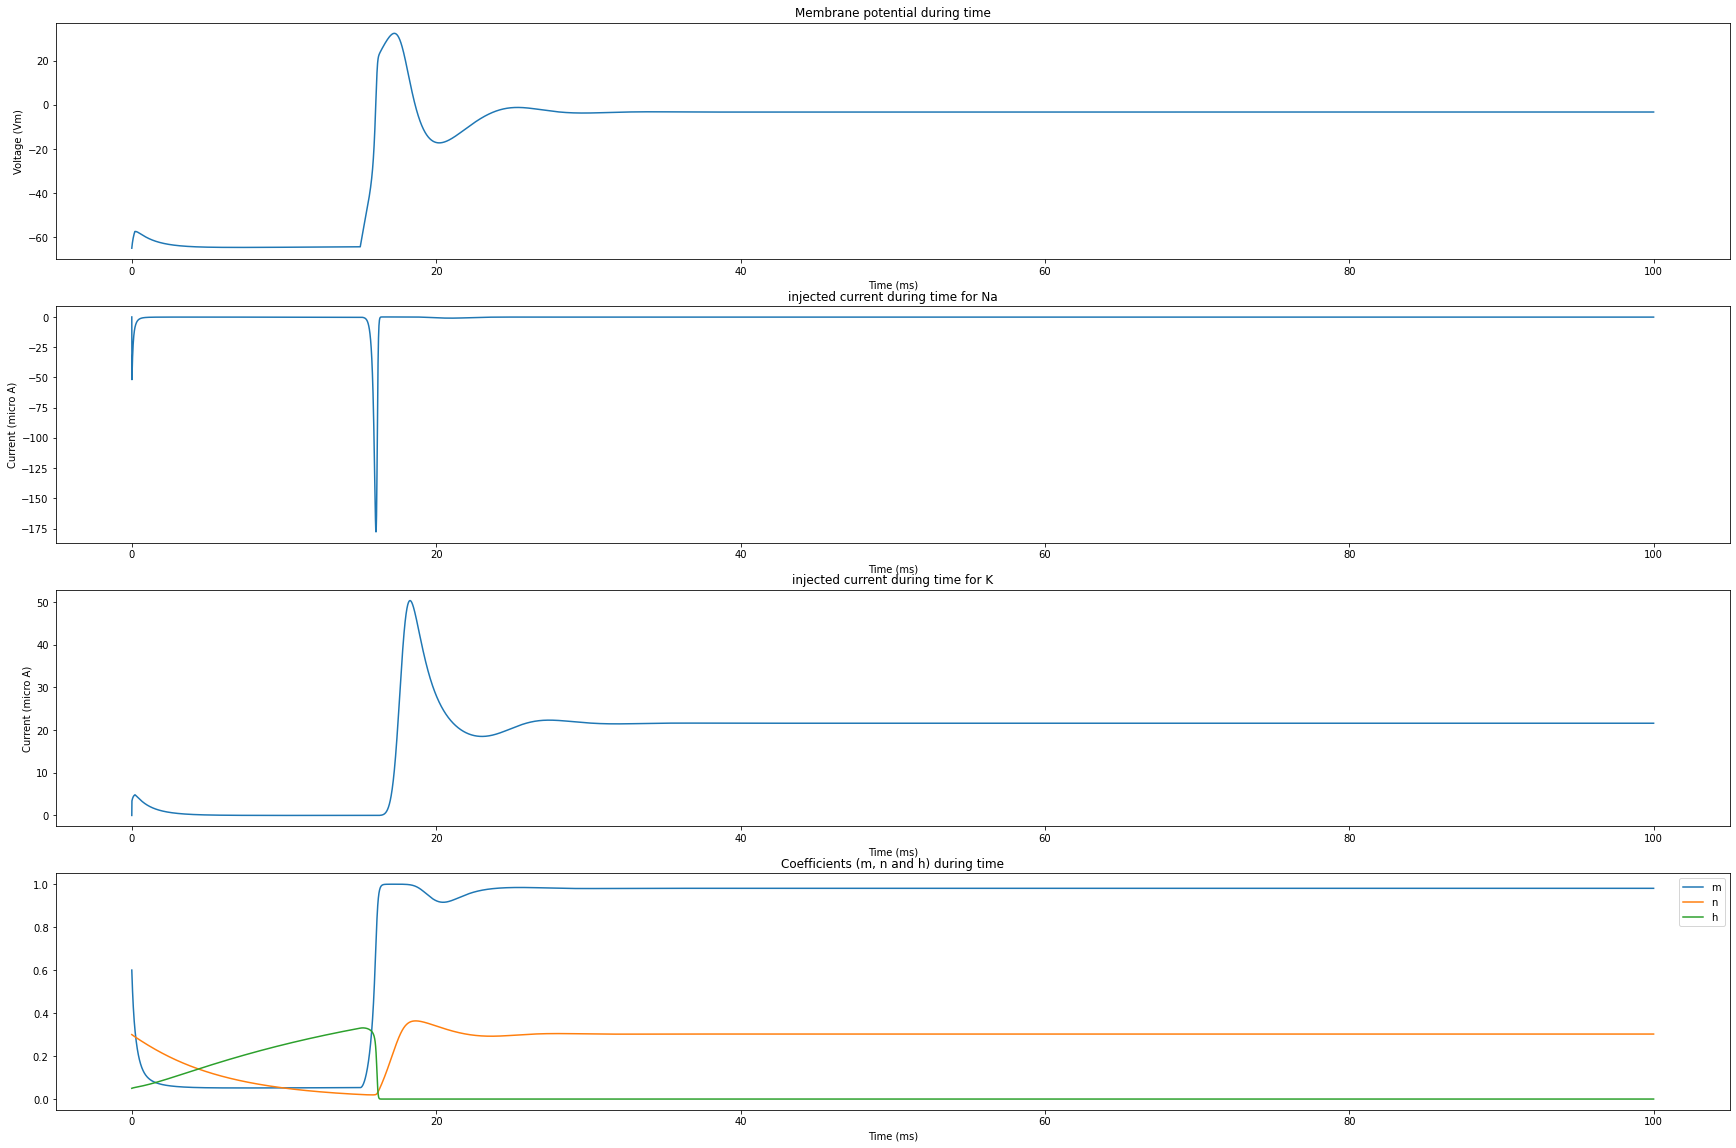

In [65]:
hh = HH()
d5 = hh.model()
hh.plot_results(d5[0], d5[1], d5[2], d5[3], d5[4], d5[5])         